In [2]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, classification_report

# import data

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
test_data2 = test_data.copy()
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
# train_data[['PassengerGrp', 'PassengerNo']] = train_data['PassengerId'].str.split('_', expand= True)
# train_data.head()

# exploration

In [6]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
train_data[['HomePlanet', 'CryoSleep', 'Destination', 'VIP']].describe()

,HomePlanet,CryoSleep,Destination,VIP
count,8492,8476,8511,8490
unique,3,2,3,2
top,Earth,False,TRAPPIST-1e,False
freq,4602,5439,5915,8291


In [8]:
train_data.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
train_data.shape

(8693, 14)

In [10]:
# colormap = plt.cm.RdBu
# plot_corr = pd.DataFrame(X)
# plt.figure(figsize=(12,10))
# plt.title('Pearson Correlation of Features', y=1.05, size=15)
# sns.heatmap(plot_corr.astype(float).corr(),linewidths=0.1,vmax=1.0,
#             square=True, cmap=colormap, linecolor='white', annot=True)

<Axes: xlabel='Transported', ylabel='count'>

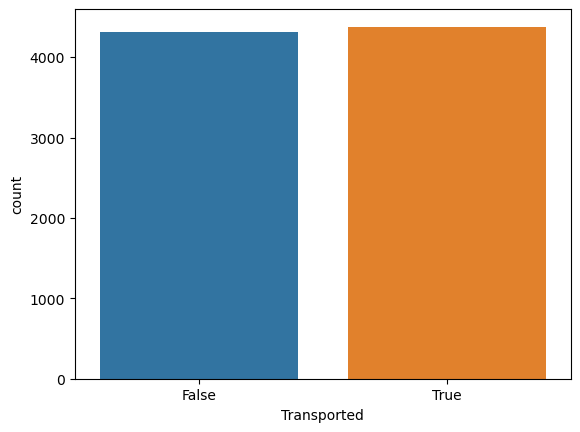

In [11]:
sns.countplot(train_data, x = 'Transported')

<Axes: xlabel='HomePlanet', ylabel='count'>

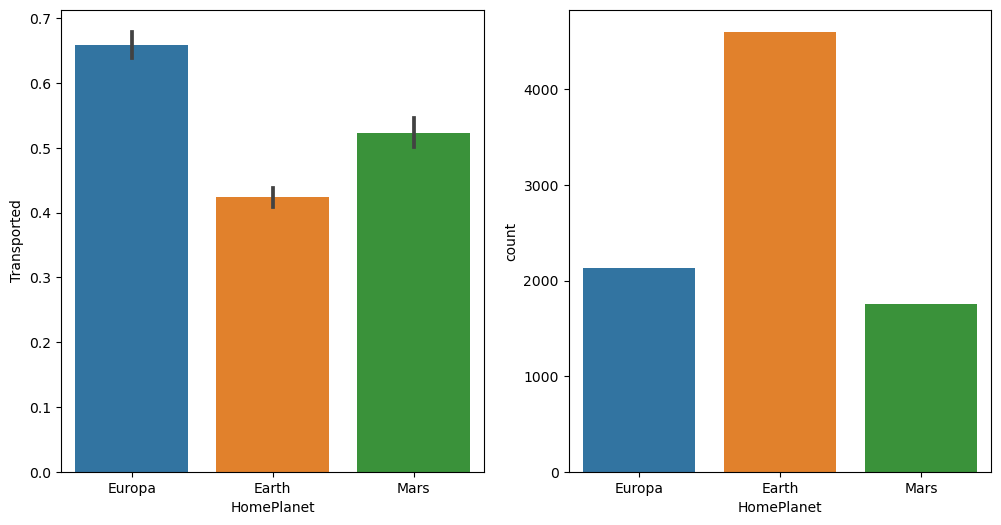

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(train_data, x = 'HomePlanet', y = 'Transported', ax = axes[0])
sns.countplot(train_data, x = 'HomePlanet', ax = axes[1])

<Axes: xlabel='CryoSleep', ylabel='count'>

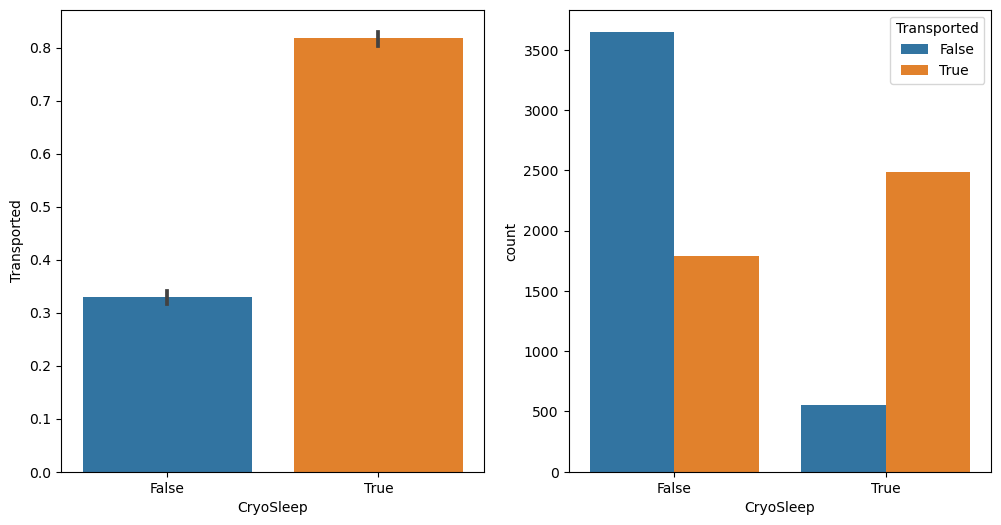

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(train_data, x = 'CryoSleep', y = 'Transported', ax = axes[0])
sns.countplot(train_data, x = 'CryoSleep', hue = 'Transported',  ax = axes[1])

<Axes: xlabel='Destination', ylabel='count'>

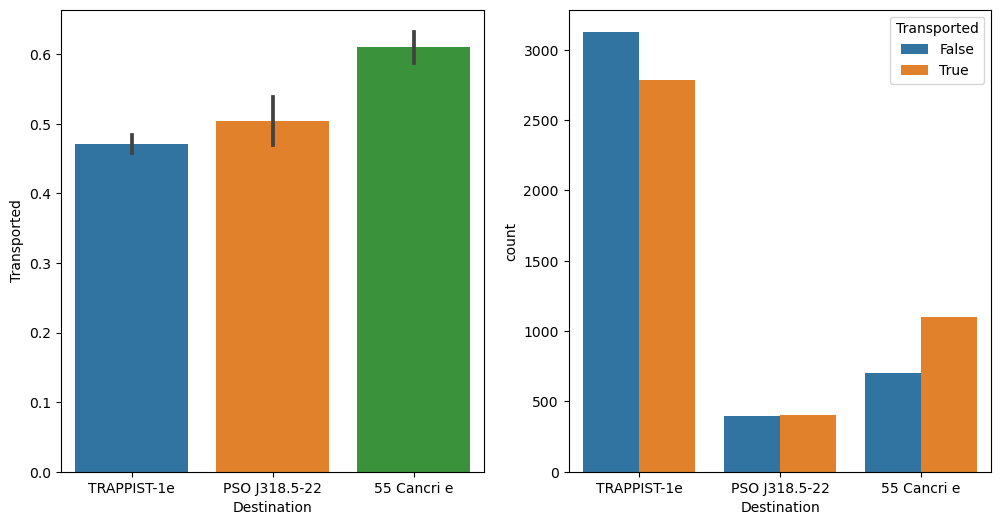

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(train_data, x = 'Destination', y = 'Transported', ax = axes[0])
sns.countplot(train_data, x = 'Destination', hue = 'Transported',  ax = axes[1])

<Axes: xlabel='Age', ylabel='Count'>

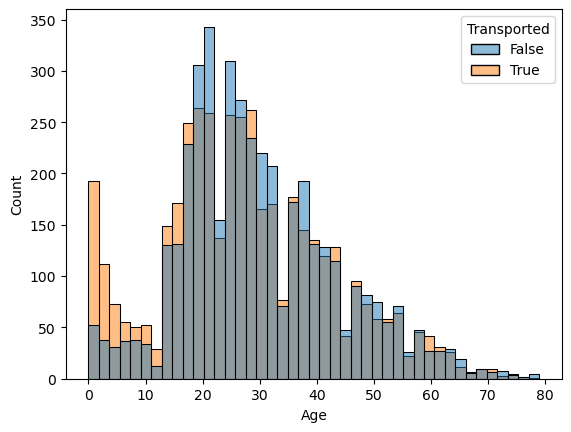

In [15]:
sns.histplot(train_data, x = 'Age', hue = 'Transported')

<Axes: xlabel='VIP', ylabel='count'>

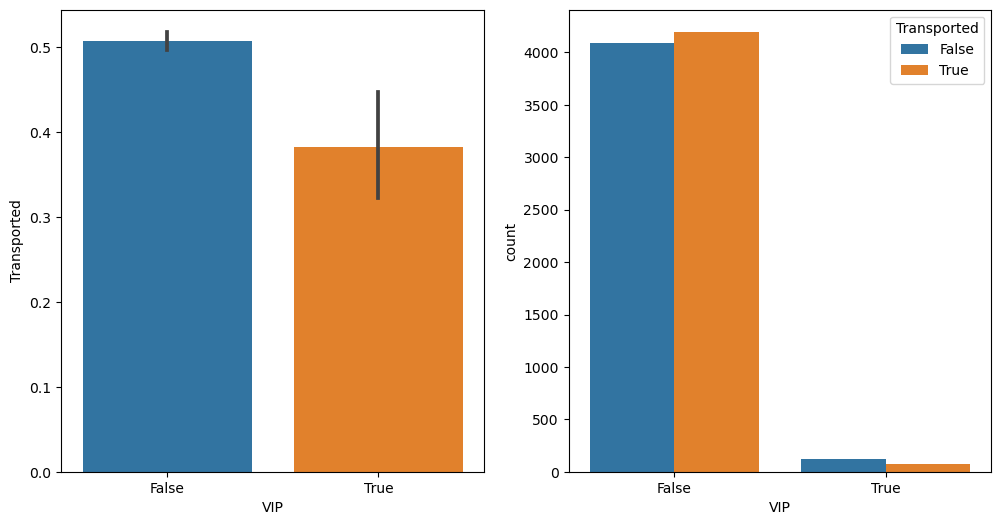

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(train_data, x = 'VIP', y = 'Transported', ax = axes[0])
sns.countplot(train_data, x = 'VIP', hue = 'Transported',  ax = axes[1])

c:\Users\DzakiyFaridFadhilah\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


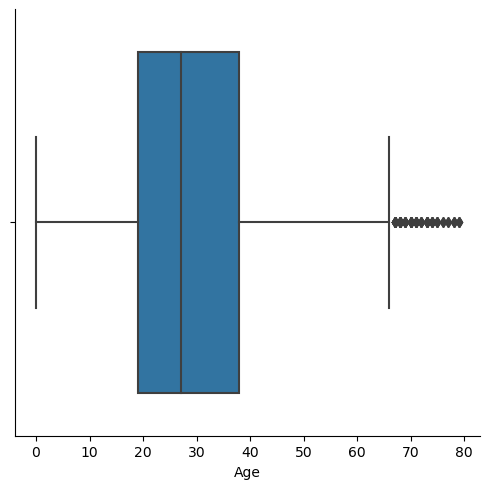

In [17]:
sns.catplot(data=train_data, x="Age", kind="box")

c:\Users\DzakiyFaridFadhilah\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\DzakiyFaridFadhilah\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


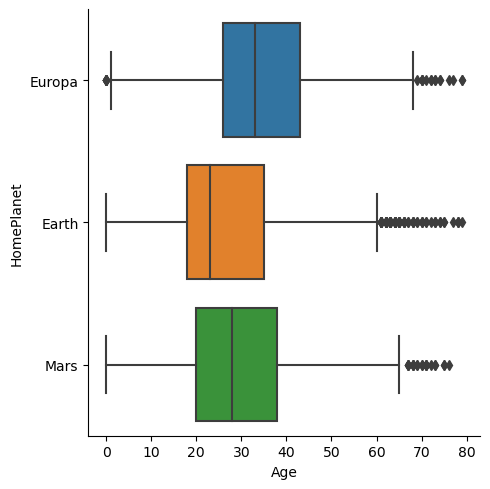

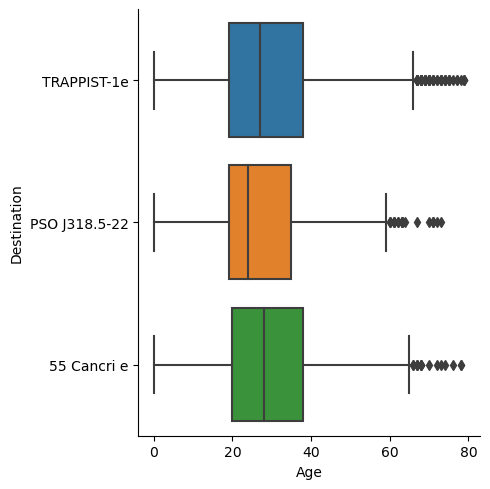

In [18]:
sns.catplot(data=train_data, x="Age", y="HomePlanet", kind="box")
sns.catplot(data=train_data, x="Age", y="Destination", kind="box")

In [19]:
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


## adding feature

In [20]:
train_data2 = train_data.copy()
train_data2.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [21]:
train_data2[['PassengerGrp', 'PassengerNo']] = train_data2['PassengerId'].str.split('_',expand=True)
train_data2.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGrp,PassengerNo
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01


In [22]:
train_data2[['CabDeck', 'CabNum', 'CabSide']] = train_data2['Cabin'].str.split('/',expand=True)
train_data2.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGrp,PassengerNo,CabDeck,CabNum,CabSide
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,F,1,S


In [23]:
train_data2 = train_data2[['PassengerGrp', 'PassengerNo','HomePlanet', 'CryoSleep','CabDeck', 'CabNum', 'CabSide','Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported']]
train_data2.head()

,PassengerGrp,PassengerNo,HomePlanet,CryoSleep,CabDeck,CabNum,CabSide,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001,01,Europa,False,B,0,P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002,01,Earth,False,F,0,S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003,01,Europa,False,A,0,S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003,02,Europa,False,A,0,S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004,01,Earth,False,F,1,S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [24]:
train_data2.dtypes

PassengerGrp     object
PassengerNo      object
HomePlanet       object
CryoSleep        object
CabDeck          object
CabNum           object
CabSide          object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

<Axes: xlabel='CabDeck', ylabel='count'>

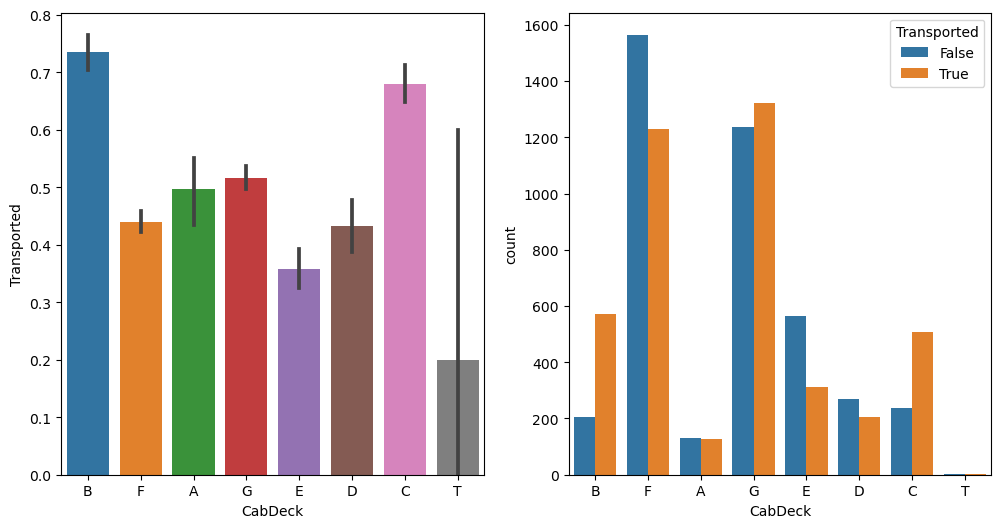

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(train_data2, x = 'CabDeck', y = 'Transported', ax = axes[0])
sns.countplot(train_data2, x = 'CabDeck', hue = 'Transported',  ax = axes[1])

<Axes: xlabel='CabSide', ylabel='count'>

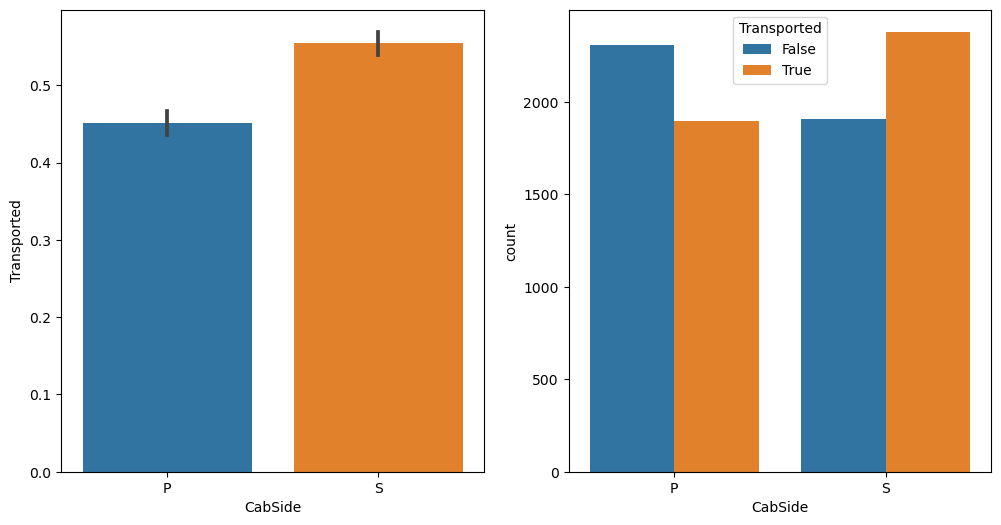

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(train_data2, x = 'CabSide', y = 'Transported', ax = axes[0])
sns.countplot(train_data2, x = 'CabSide', hue = 'Transported',  ax = axes[1])

In [27]:
train_data2['IsNotAlone'] = train_data2['PassengerGrp'].eq(train_data2['PassengerGrp'].shift(1)) | train_data2['PassengerGrp'].eq(train_data2['PassengerGrp'].shift(-1))
train_data2.tail()

,PassengerGrp,PassengerNo,HomePlanet,CryoSleep,CabDeck,CabNum,CabSide,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,IsNotAlone
8688,9276,01,Europa,False,A,98,P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,False
8689,9278,01,Earth,True,G,1499,S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,False
8690,9279,01,Earth,False,G,1500,S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,False
8691,9280,01,Europa,False,E,608,S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,True
8692,9280,02,Europa,False,E,608,S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True,True


<Axes: xlabel='IsNotAlone', ylabel='count'>

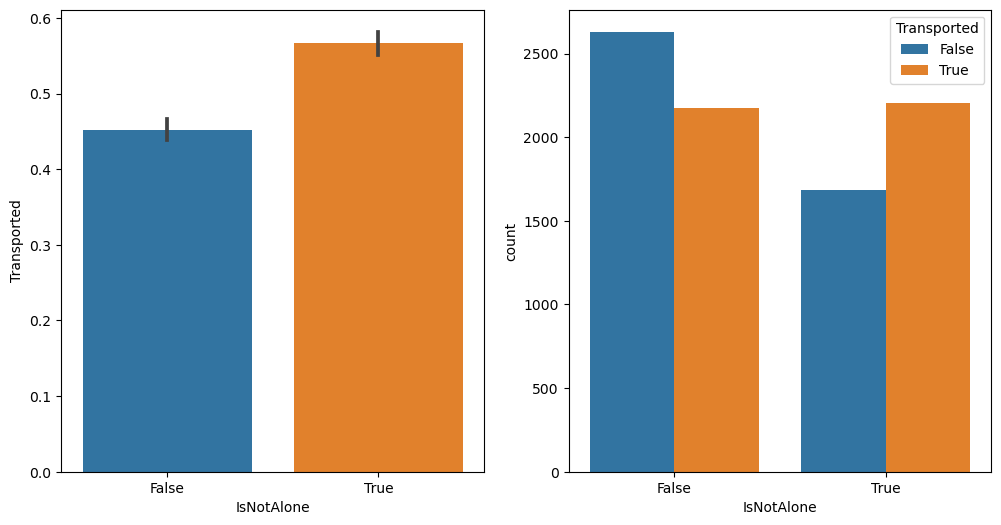

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(train_data2, x = 'IsNotAlone', y = 'Transported', ax = axes[0])
sns.countplot(train_data2, x = 'IsNotAlone', hue = 'Transported',  ax = axes[1])

In [29]:
train_data2['group_size'] = train_data2.groupby('PassengerGrp')['PassengerNo'].transform('size')

In [30]:
train_data2['group_size'].value_counts().sort_index()

group_size
1    4805
2    1682
3    1020
4     412
5     265
6     174
7     231
8     104
Name: count, dtype: int64

<Axes: xlabel='group_size', ylabel='count'>

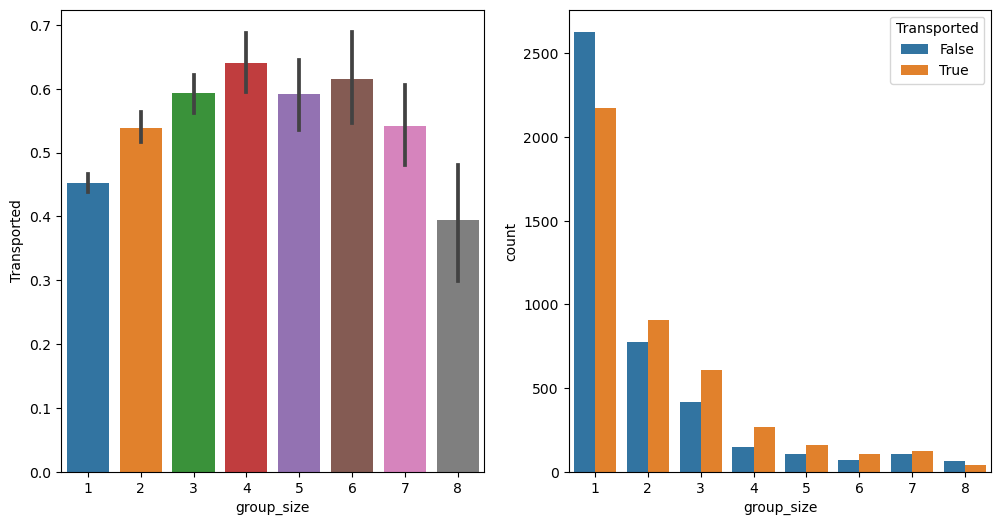

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(train_data2, x = 'group_size', y = 'Transported', ax = axes[0])
sns.countplot(train_data2, x = 'group_size', hue = 'Transported', ax = axes[1])

In [32]:
train_data2.head()

,PassengerGrp,PassengerNo,HomePlanet,CryoSleep,CabDeck,CabNum,CabSide,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,IsNotAlone,group_size
0,0001,01,Europa,False,B,0,P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,False,1
1,0002,01,Earth,False,F,0,S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,False,1
2,0003,01,Europa,False,A,0,S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,True,2
3,0003,02,Europa,False,A,0,S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,True,2
4,0004,01,Earth,False,F,1,S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,False,1


In [33]:
train_data2.columns

Index(['PassengerGrp', 'PassengerNo', 'HomePlanet', 'CryoSleep', 'CabDeck',
       'CabNum', 'CabSide', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported',
       'IsNotAlone', 'group_size'],
      dtype='object')

# make prediction

## prepare dataset

### clean missing value

In [34]:
train_data2.isna().sum()

PassengerGrp      0
PassengerNo       0
HomePlanet      201
CryoSleep       217
CabDeck         199
CabNum          199
CabSide         199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
IsNotAlone        0
group_size        0
dtype: int64

deal with nan:
- people in the same group have the same home planet and destination and most likely the same cabin
- if group_size = 1, then the planet depends on cabin and vice versa and destination can fill with ffil
- fill nan age with avg


In [35]:
train_data2['HomePlanet'] = train_data2.groupby('PassengerGrp')['HomePlanet'].fillna(method = 'ffill')
train_data2['HomePlanet'] = train_data2.groupby('PassengerGrp')['HomePlanet'].fillna(method = 'bfill')

In [36]:
train_data2['Destination'] = train_data2.groupby('PassengerGrp')['Destination'].fillna(method = 'ffill')
train_data2['Destination'] = train_data2.groupby('PassengerGrp')['Destination'].fillna(method = 'bfill')

In [37]:
cabin_list = ['CabDeck', 'CabNum', 'CabSide']
for i in cabin_list:
    train_data2[i] = train_data2.groupby('PassengerGrp')[i].fillna(method = 'ffill')
    train_data2[i] = train_data2.groupby('PassengerGrp')[i].fillna(method = 'bfill')

In [38]:
train_data2['HomePlanet'].isna().sum()

111

In [39]:
train_data2[(train_data2['group_size'] > 1) & (train_data2['HomePlanet'].isna())]

,PassengerGrp,PassengerNo,HomePlanet,CryoSleep,CabDeck,CabNum,CabSide,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,IsNotAlone,group_size
6917,7336,01,NaN,False,F,1411,S,TRAPPIST-1e,30.0,False,2.0,0.0,5.0,1.0,962.0,Dianie Lambles,False,True,2
6918,7336,02,NaN,False,F,1411,S,TRAPPIST-1e,26.0,False,0.0,0.0,902.0,0.0,0.0,Tanley Leodger,False,True,2


In [40]:
train_data2.iloc[6917, 2] = 'Mars'
train_data2.iloc[6918, 2] = 'Mars'

In [41]:
train_data2[(train_data2['CabDeck'].isna()) & (train_data2['HomePlanet'].isna())]

,PassengerGrp,PassengerNo,HomePlanet,CryoSleep,CabDeck,CabNum,CabSide,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,IsNotAlone,group_size
1550,1645,01,NaN,True,NaN,NaN,NaN,55 Cancri e,18.0,False,0.0,0.0,0.0,0.0,0.0,Andace Thonyderson,False,False,1
1714,1823,01,NaN,False,NaN,NaN,NaN,TRAPPIST-1e,67.0,False,143.0,68.0,496.0,182.0,9.0,Loree Byerson,True,False,1
3858,4134,01,NaN,True,NaN,NaN,NaN,TRAPPIST-1e,40.0,False,0.0,0.0,0.0,0.0,0.0,Cird Datty,True,False,1
7293,7801,01,NaN,False,NaN,NaN,NaN,55 Cancri e,21.0,False,1720.0,2337.0,0.0,1.0,335.0,Eliana Coopezmaney,False,False,1


In [42]:
train_data2.isna().sum()

PassengerGrp      0
PassengerNo       0
HomePlanet      109
CryoSleep       217
CabDeck          99
CabNum           99
CabSide          99
Destination     103
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
IsNotAlone        0
group_size        0
dtype: int64

In [43]:
train_data2.head()

,PassengerGrp,PassengerNo,HomePlanet,CryoSleep,CabDeck,CabNum,CabSide,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,IsNotAlone,group_size
0,0001,01,Europa,False,B,0,P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,False,1
1,0002,01,Earth,False,F,0,S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,False,1
2,0003,01,Europa,False,A,0,S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,True,2
3,0003,02,Europa,False,A,0,S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,True,2
4,0004,01,Earth,False,F,1,S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,False,1


In [44]:
def fill_deck(row):
    list_earth = ['F', 'G', 'E']
    list_Europa = ['B', 'A', 'C', 'D', 'E', 'T']
    list_Mars = ['F', 'D', 'E']
    if pd.isna(row['CabDeck']):
        if row['HomePlanet'] == 'Earth':
            return np.random.choice(list_earth)
        elif row['HomePlanet'] == 'Europa':
            return np.random.choice(list_Europa)
        elif row['HomePlanet'] == 'Mars':
            return np.random.choice(list_Mars)
    return row['CabDeck']

def fill_home_planet(row):
    list_earth = ['G']
    list_Europa = ['B', 'A', 'C', 'D', 'T']
    list_Mars = ['D']
    list_earth_mars = ['F']
    list_earth_mars_europa = ['E']

    if pd.isna(row['HomePlanet']):
        cab_deck = row['CabDeck']
        if cab_deck in list_earth:
            return 'Earth'
        elif cab_deck in list_Europa:
            return 'Europa'
        elif cab_deck in list_Mars:
            return 'Mars'
        elif cab_deck in list_earth_mars:
            return np.random.choice(['Earth', 'Mars'])
        elif cab_deck in list_earth_mars_europa:
            return np.random.choice(['Earth', 'Mars', 'Europa'])
    return row['HomePlanet']

In [45]:
train_data2['HomePlanet'] = train_data2.apply(fill_home_planet, axis = 1)
train_data2['CabDeck'] = train_data2.apply(fill_deck, axis = 1) #problemmmm

In [46]:
train_data2.isna().sum()

PassengerGrp      0
PassengerNo       0
HomePlanet        4
CryoSleep       217
CabDeck           4
CabNum           99
CabSide          99
Destination     103
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
IsNotAlone        0
group_size        0
dtype: int64

In [47]:
train_data2['Age'].mean()

28.82793046746535

In [48]:
train_data2[['HomePlanet','CabDeck','CabNum','CabSide','Destination']] = \
    train_data2[['HomePlanet','CabDeck','CabNum','CabSide','Destination']].fillna(method='ffill')
train_data2['CryoSleep'] = train_data2['CryoSleep'].fillna(np.random.choice([True, False]))
train_data2['Age'] = train_data2['Age'].fillna(train_data2['Age'].mean())

In [49]:
train_data2[train_data2['VIP'] ==True][10:25]

,PassengerGrp,PassengerNo,HomePlanet,CryoSleep,CabDeck,CabNum,CabSide,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,IsNotAlone,group_size
404,0444,01,Mars,False,D,15,P,TRAPPIST-1e,32.0,True,2484.0,429.0,102.0,0.0,0.0,Camonk Curte,False,True,2
405,0444,02,Mars,False,F,99,P,TRAPPIST-1e,26.0,True,1869.0,0.0,136.0,0.0,0.0,Colal Curte,False,True,2
417,0454,01,Europa,True,B,15,S,55 Cancri e,28.0,True,5.0,4288.0,0.0,745.0,5.0,Tabius Geoconne,True,True,3
536,0570,01,Europa,False,C,22,S,TRAPPIST-1e,36.0,True,530.0,5085.0,1.0,146.0,872.0,Chard Tramsor,True,False,1
589,0612,01,Europa,True,B,25,P,TRAPPIST-1e,27.0,True,0.0,0.0,0.0,0.0,0.0,Achyon Ranaly,True,False,1
603,0633,01,Mars,False,D,25,P,PSO J318.5-22,31.0,True,629.0,0.0,0.0,150.0,0.0,Cakes Gread,False,False,1
657,0686,02,Mars,False,D,30,P,TRAPPIST-1e,29.0,True,3887.0,0.0,NaN,12.0,0.0,Cheat Bert,False,True,2
750,0789,01,Europa,False,A,8,S,TRAPPIST-1e,31.0,True,0.0,166.0,4.0,2177.0,342.0,Mesath Imprank,False,True,3
764,0805,01,Europa,False,C,29,P,55 Cancri e,36.0,True,0.0,13248.0,100.0,1953.0,1.0,Glueba Chuble,True,False,1
779,0818,01,Europa,False,B,29,S,TRAPPIST-1e,71.0,True,0.0,0.0,0.0,0.0,0.0,Ksorab Couseced,True,False,1


In [50]:
train_data2['VIP'] = train_data2['VIP'].fillna(np.random.choice([True,False]))

<Axes: xlabel='HomePlanet', ylabel='Transported'>

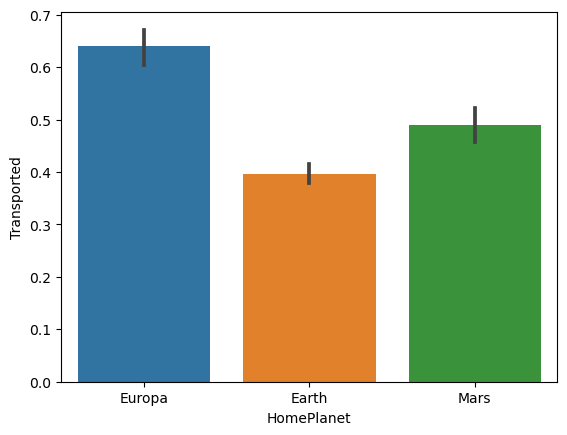

In [51]:
sns.barplot(train_data2[train_data2['group_size'] == 1], x = 'HomePlanet', y = 'Transported')

In [52]:
train_data2[['RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].mean()

RoomService     224.687617
FoodCourt       458.077203
ShoppingMall    173.729169
Spa             311.138778
VRDeck          304.854791
dtype: float64

In [53]:
train_data2[['RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = \
    train_data2[['RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(0)

In [54]:
train_data2['Spending'] = train_data2['RoomService'] + train_data2['FoodCourt'] + train_data2['ShoppingMall'] +train_data2['Spa'] + train_data2['VRDeck']

In [55]:
# from sklearn.preprocessing import MinMaxScaler

# columns_to_rescale = ['Age', 'RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Spending']
# scaler = MinMaxScaler()
# train_data2[columns_to_rescale] = scaler.fit_transform(train_data2[columns_to_rescale])


In [56]:
from sklearn.model_selection import train_test_split
X = train_data2.drop(['Transported', 'Name', 'PassengerGrp','PassengerNo'], axis = 1) #'RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Spending'
y = train_data2['Transported']
X.head()

,HomePlanet,CryoSleep,CabDeck,CabNum,CabSide,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,IsNotAlone,group_size,Spending
0,Europa,False,B,0,P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,0.0
1,Earth,False,F,0,S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,False,1,736.0
2,Europa,False,A,0,S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,True,2,10383.0
3,Europa,False,A,0,S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,True,2,5176.0
4,Earth,False,F,1,S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,False,1,1091.0


In [57]:
X.isna().sum()

HomePlanet      0
CryoSleep       0
CabDeck         0
CabNum          0
CabSide         0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
IsNotAlone      0
group_size      0
Spending        0
dtype: int64

In [58]:
# X[X['HomePlanet'] == 'Europa']['CabDeck'].unique()

earth =
G    2498
F    1614
E     395

Europa =
B    766
C    734
A    252
D    186
E    128
T      4

Mars =
F    1110
E     330
D     282

In [59]:
# nan_list = X.index[(X['HomePlanet'].isna())] #& (X['CabDeck'].isna())]
# X.iloc[nan_list]

In [60]:
X[['HomePlanet', 'CryoSleep', 'CabDeck', 'CabNum', 'CabSide', 'Destination',  'IsNotAlone', 'VIP']] = X[['HomePlanet', 'CryoSleep', 'CabDeck', 'CabNum', 'CabSide', 'Destination',  'IsNotAlone','VIP']].fillna(method='ffill')

In [61]:
X.columns

Index(['HomePlanet', 'CryoSleep', 'CabDeck', 'CabNum', 'CabSide',
       'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'IsNotAlone', 'group_size', 'Spending'],
      dtype='object')

In [62]:
X[['CabNum','CryoSleep','VIP','IsNotAlone']] = X[['CabNum','CryoSleep','VIP','IsNotAlone']].astype(int)

In [63]:
X.dtypes

HomePlanet       object
CryoSleep         int32
CabDeck          object
CabNum            int32
CabSide          object
Destination      object
Age             float64
VIP               int32
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
IsNotAlone        int32
group_size        int64
Spending        float64
dtype: object

In [64]:
X.isna().sum()

HomePlanet      0
CryoSleep       0
CabDeck         0
CabNum          0
CabSide         0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
IsNotAlone      0
group_size      0
Spending        0
dtype: int64

In [65]:
X = pd.get_dummies(X, columns= ['HomePlanet', 'CabDeck', 'CabSide','Destination'])
X.head()

,CryoSleep,CabNum,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,IsNotAlone,...,CabDeck_D,CabDeck_E,CabDeck_F,CabDeck_G,CabDeck_T,CabSide_P,CabSide_S,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,...,False,False,False,False,False,True,False,False,False,True
1,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0,0,...,False,False,True,False,False,False,True,False,False,True
2,0,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,1,...,False,False,False,False,False,False,True,False,False,True
3,0,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,1,...,False,False,False,False,False,False,True,False,False,True
4,0,1,16.0,0,303.0,70.0,151.0,565.0,2.0,0,...,False,False,True,False,False,False,True,False,False,True


In [66]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.2, random_state= 1)

## dectree

In [67]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

class_weight_dict = dict(enumerate(class_weights))

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# parameters = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 5, 10, 15],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': [None, 'sqrt', 'log2'],
#     'splitter': ['best', 'random']
# }
# dt = DecisionTreeClassifier(random_state=0)
# dt_gs = GridSearchCV(dt, parameters, cv = 5, scoring='accuracy', n_jobs=-1, verbose= 3)
# dt_gs.fit(X_train, y_train)
# dt_gs.best_params_

In [69]:
dt = DecisionTreeClassifier(criterion ='gini', max_depth= 5, max_features= None,
 min_samples_leaf= 4, min_samples_split= 2, splitter= 'best', class_weight=class_weight_dict, random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 1.0014400921658986,
                                     1: 0.9985640436530729},
                       max_depth=5, min_samples_leaf=4, random_state=0)

In [70]:
cv_scores_dt = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores_dt)
print("%f accuracy with a standard deviation of %f" % (cv_scores_dt.mean(), cv_scores_dt.std()))

Cross-Validation Scores: [0.76994968 0.77857656 0.77857656 0.76491733 0.77122302]
0.772649 accuracy with a standard deviation of 0.005280


In [71]:
y_val_pred = dt.predict(X_val)


Random Forest

Precision: 0.7788269340108008
Recall: 0.7786083956296722
F1 Score: 0.7783639563361284


<Axes: >

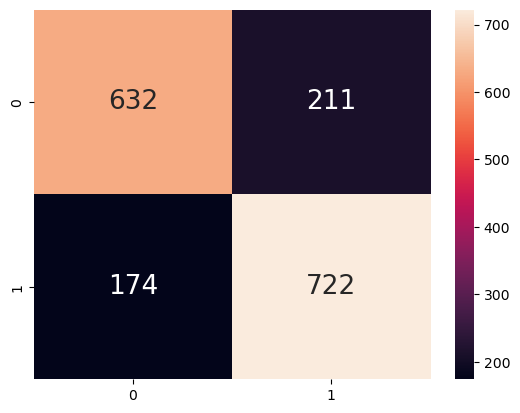

In [72]:
# print out metric scores
print("Random Forest\n")
# Precision: TP/(TP+FP)
print("Precision:", precision_score(y_val, y_val_pred, average='weighted'))
# Recall: TP/(TP+FN)
print("Recall:", recall_score(y_val, y_val_pred, average='weighted'))
# F1 Score: 2*recall*precision/(recall+precision) ie. balance between precision and recall
print("F1 Score:", f1_score(y_val, y_val_pred, average='weighted'))

sns.heatmap(confusion_matrix(y_val, y_val_pred),
           annot = True, fmt=".0f", annot_kws={"size": 19})

In [73]:
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

       False       0.78      0.75      0.77       843
        True       0.77      0.81      0.79       896

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



## random forest

In [74]:
from sklearn.ensemble import RandomForestClassifier

# parameters = {
#     'n_estimators': [50, 100,150,200,250],
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2', None],
# }
# rf = RandomForestClassifier(random_state=0)
# rf_gs = GridSearchCV(rf, parameters, cv = 5, scoring='accuracy', verbose= 3)
# rf_gs.fit(X_train, y_train)
# rf_gs.best_params_

Fitting 5 folds for each of 810 candidates, totalling 4050 fits
[CV 1/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.796 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.799 total time=   0.4s


[CV 3/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.799 total time=   0.5s
[CV 4/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.779 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.809 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.802 total time=   0.9s
[CV 2/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.806 total time=   0.8s
[CV 3/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.804 total time=   0.8s
[CV 4/5] END criterion=gini, max_depth=None, max_features=sqrt, min_sampl

KeyboardInterrupt: 

In [ ]:
rf = RandomForestClassifier(random_state = 0, class_weight=class_weight_dict,
 criterion= 'entropy',
 max_depth= 10,
 max_features= None,
 min_samples_leaf= 2,
 min_samples_split= 10,
 n_estimators= 100) #########
rf.fit(X_train, y_train)
print("Classification Accuracy \t:", rf.score(X_train, y_train))

Classification Accuracy 	: 0.8904227782571182


In [ ]:
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("%f accuracy with a standard deviation of %f" % (cv_scores.mean(), cv_scores.std()))

y_val_pred = rf.predict(X_val)

Cross-Validation Scores: [0.8015816  0.80014378 0.80948958 0.79439252 0.79064748]
0.799251 accuracy with a standard deviation of 0.006460


Random Forest

Precision: 0.8029177989965445
Recall: 0.8027602070155262
F1 Score: 0.8027941405075852


<Axes: >

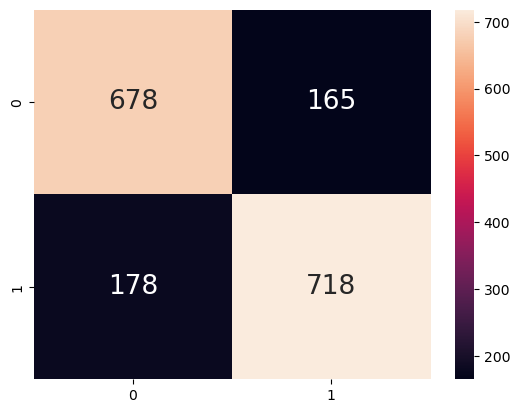

In [ ]:
# print out metric scores
print("Random Forest\n")
# Precision: TP/(TP+FP)
print("Precision:", precision_score(y_val, y_val_pred, average='weighted'))
# Recall: TP/(TP+FN)
print("Recall:", recall_score(y_val, y_val_pred, average='weighted'))
# F1 Score: 2*recall*precision/(recall+precision) ie. balance between precision and recall
print("F1 Score:", f1_score(y_val, y_val_pred, average='weighted'))
#heatmap
sns.heatmap(confusion_matrix(y_val, y_val_pred),
           annot = True, fmt=".0f", annot_kws={"size": 19})

In [ ]:
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

       False       0.79      0.80      0.80       843
        True       0.81      0.80      0.81       896

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



## svm

In [ ]:
from sklearn.svm import SVC

# parameters = {'C': [0.1, 1, 10, 100, 1000],
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf', 'sigmoid']}#'sigmoid','linear']}
# svm = SVC(random_state=0)
# svm_gs = GridSearchCV(svm, parameters, cv = 5,scoring='accuracy', verbose= 3)
# svm_gs.fit(X_train, y_train)
# svm_gs.best_params_

In [ ]:
svm1 = SVC(C = 1000, gamma = 0.0001, kernel= 'rbf',class_weight=class_weight_dict,probability=True, random_state = 0) #C = 100, gamma = 0.001, kernel= 'rbf',
svm1.fit(X_train, y_train)

SVC(C=1000, class_weight={0: 1.0014400921658986, 1: 0.9985640436530729},
    gamma=0.0001, probability=True, random_state=0)

In [ ]:
cv_scores = cross_val_score(svm1, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

y_val_pred = svm1.predict(X_val)

Cross-Validation Scores: [0.74406902 0.72897196 0.74550683 0.73975557 0.74676259]
Mean Accuracy: 0.7410131937584368


Precision: 0.7541838757496836
Recall: 0.7452558941920644
F1 Score: 0.7440053776822071


<Axes: >

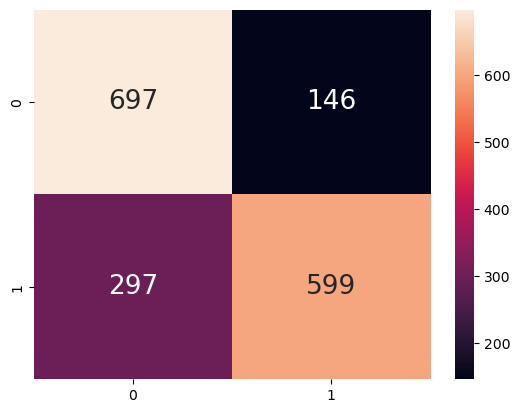

In [ ]:
# Precision: TP/(TP+FP)
print("Precision:", precision_score(y_val, y_val_pred, average='weighted'))
# Recall: TP/(TP+FN)
print("Recall:", recall_score(y_val, y_val_pred, average='weighted'))
# F1 Score: 2*recall*precision/(recall+precision) ie. balance between precision and recall
print("F1 Score:", f1_score(y_val, y_val_pred, average='weighted'))

sns.heatmap(confusion_matrix(y_val, y_val_pred),
           annot = True, fmt=".0f", annot_kws={"size": 19})

In [ ]:
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

       False       0.70      0.83      0.76       843
        True       0.80      0.67      0.73       896

    accuracy                           0.75      1739
   macro avg       0.75      0.75      0.74      1739
weighted avg       0.75      0.75      0.74      1739



## gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# parameters = {
#     "loss":['log_loss', 'exponential'],
#     "learning_rate": [0.01, 0.05, 0.075, 0.1],
#     "min_samples_split": np.linspace(0.1, 0.5, 1),
#     "min_samples_leaf": np.linspace(0.1, 0.5, 1),
#     "max_depth":[3,5,8,10],
#     "max_features":["log2","sqrt"],
#     "criterion": ["friedman_mse", "squared_error"],
#     "subsample":[1.0],
#     "n_estimators":[10,50,100,200]
#     }

# gb = GradientBoostingClassifier(random_state=0)
# gb_gs = GridSearchCV(gb, parameters, cv = 5,refit= True, verbose= 3)
# gb_gs.fit(X_train, y_train)
# gb_gs.best_params_

In [ ]:
gb1 = GradientBoostingClassifier(random_state=0, criterion= 'friedman_mse',
 learning_rate= 0.1,
 loss= 'exponential',
 max_depth= 5,
 max_features= 'log2',
 min_samples_leaf= 0.1,
 min_samples_split= 0.1,
 n_estimators= 200,
 subsample= 1.0) #########
gb1.fit(X_train, y_train)
print("Classification Accuracy \t:", gb1.score(X_train, y_train))

Classification Accuracy 	: 0.8032786885245902


In [ ]:
cv_scores = cross_val_score(gb1, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("%f accuracy with a standard deviation of %f" % (cv_scores.mean(), cv_scores.std()))

y_val_pred = gb1.predict(X_val)

Cross-Validation Scores: [0.79439252 0.79367362 0.78576564 0.79367362 0.80071942]
0.793645 accuracy with a standard deviation of 0.004747


Precision: 0.7935268428118073
Recall: 0.7935595169637722
F1 Score: 0.7935113934879543


<Axes: >

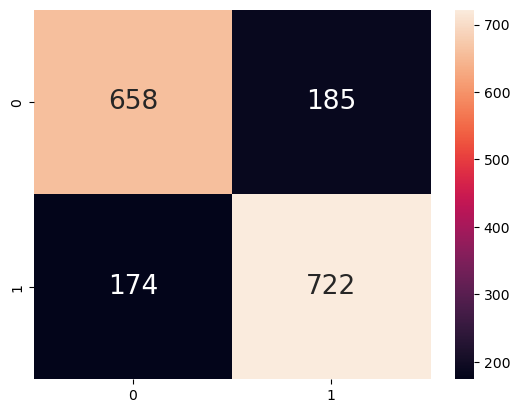

In [ ]:
# Precision: TP/(TP+FP)
print("Precision:", precision_score(y_val, y_val_pred, average='weighted'))
# Recall: TP/(TP+FN)
print("Recall:", recall_score(y_val, y_val_pred, average='weighted'))
# F1 Score: 2*recall*precision/(recall+precision) ie. balance between precision and recall
print("F1 Score:", f1_score(y_val, y_val_pred, average='weighted'))

sns.heatmap(confusion_matrix(y_val, y_val_pred),
           annot = True, fmt=".0f", annot_kws={"size": 19})

In [ ]:
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

       False       0.79      0.78      0.79       843
        True       0.80      0.81      0.80       896

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



## xgboost

In [ ]:
from xgboost import XGBClassifier

# parameters = {
#     'learning_rate': [0.01, 0.1, 0.2],
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 4, 5],
# }

# xgb = XGBClassifier(random_state=0)
# xgb_gs = GridSearchCV(xgb, parameters, cv = 5,scoring='accuracy', verbose= 3)
# xgb_gs.fit(X_train, y_train)
# xgb_gs.best_params_

In [ ]:
xgb1 = XGBClassifier(learning_rate = 0.01, max_depth = 5, n_estimators= 300, random_state=0) #########
xgb1.fit(X_train, y_train)
print("Classification Accuracy \t:", xgb1.score(X_train, y_train))

Classification Accuracy 	: 0.8329019269485188


In [ ]:
cv_scores = cross_val_score(xgb1, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("%f accuracy with a standard deviation of %f" % (cv_scores.mean(), cv_scores.std()))

y_val_pred = xgb1.predict(X_val)

Cross-Validation Scores: [0.80014378 0.8023005  0.81020848 0.79367362 0.8028777 ]
0.801841 accuracy with a standard deviation of 0.005308


Precision: 0.804679323907327
Recall: 0.80448533640023
F1 Score: 0.8043090625462452


<Axes: >

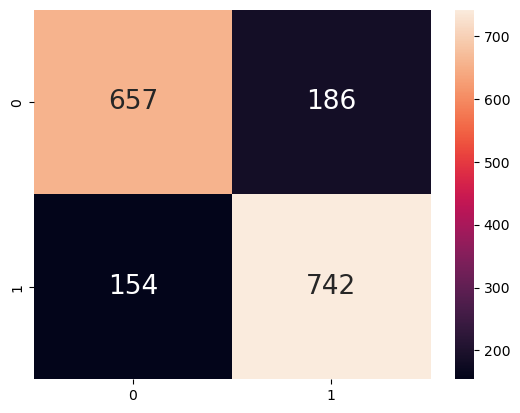

In [ ]:
# Precision: TP/(TP+FP)
print("Precision:", precision_score(y_val, y_val_pred, average='weighted'))
# Recall: TP/(TP+FN)
print("Recall:", recall_score(y_val, y_val_pred, average='weighted'))
# F1 Score: 2*recall*precision/(recall+precision) ie. balance between precision and recall
print("F1 Score:", f1_score(y_val, y_val_pred, average='weighted'))

sns.heatmap(confusion_matrix(y_val, y_val_pred),
           annot = True, fmt=".0f", annot_kws={"size": 19})

In [ ]:
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

       False       0.81      0.78      0.79       843
        True       0.80      0.83      0.81       896

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



In [ ]:
y_val

1454     True
218     False
7866    False
7622     True
4108    False
        ...  
3612     True
157     False
5025     True
4370     True
383      True
Name: Transported, Length: 1739, dtype: bool

In [ ]:
y_val_pred.astype(bool)

array([ True,  True,  True, ...,  True,  True,  True])

## mlp classifier

In [ ]:
from sklearn.neural_network import MLPClassifier

# parameters = {
#     'hidden_layer_sizes': [(100,), (50, 50), (30, 20, 10), (30,30,30)],
#     'activation': ['relu', 'tanh', 'logistic'],
#     'alpha': [0.0001, 0.001, 0.01],
#     'solver': ['sgd', 'adam'],
#     'max_iter': [1200,1300,1500,1700]
# }

# mlp = MLPClassifier(early_stopping = True, random_state= 0)
# mlp_gs = GridSearchCV(mlp, parameters, cv = 5,scoring='accuracy', verbose= 3)
# mlp_gs.fit(X_train, y_train)
# mlp_gs.best_params_

In [ ]:
mlp1 = MLPClassifier(activation= 'tanh',
 alpha= 0.01,
 hidden_layer_sizes= (50,50),
 max_iter= 1200, early_stopping = True, random_state= 0) #########
mlp1.fit(X_train, y_train)
print("Classification Accuracy \t:", mlp1.score(X_train, y_train))

Classification Accuracy 	: 0.76775956284153


In [ ]:
cv_scores = cross_val_score(mlp1, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("%f accuracy with a standard deviation of %f" % (cv_scores.mean(), cv_scores.std()))

y_val_pred = mlp1.predict(X_val)


Cross-Validation Scores: [0.75413372 0.74047448 0.7526959  0.73616104 0.74388489]
0.745470 accuracy with a standard deviation of 0.006948


Precision: 0.7609023281879104
Recall: 0.753306497987349
F1 Score: 0.7523655342291398


<Axes: >

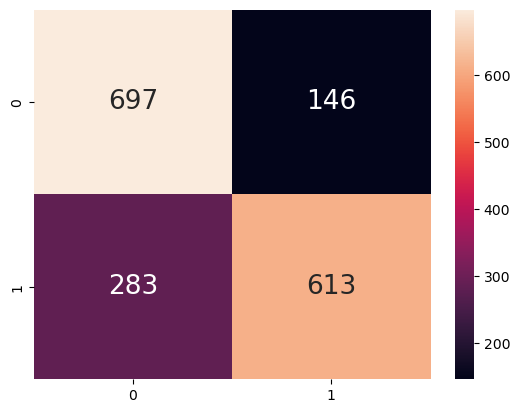

In [ ]:
# Precision: TP/(TP+FP)
print("Precision:", precision_score(y_val, y_val_pred, average='weighted'))
# Recall: TP/(TP+FN)
print("Recall:", recall_score(y_val, y_val_pred, average='weighted'))
# F1 Score: 2*recall*precision/(recall+precision) ie. balance between precision and recall
print("F1 Score:", f1_score(y_val, y_val_pred, average='weighted'))

sns.heatmap(confusion_matrix(y_val, y_val_pred),
           annot = True, fmt=".0f", annot_kws={"size": 19})

In [ ]:
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

       False       0.71      0.83      0.76       843
        True       0.81      0.68      0.74       896

    accuracy                           0.75      1739
   macro avg       0.76      0.76      0.75      1739
weighted avg       0.76      0.75      0.75      1739



## voting classifier

Classification Accuracy 	: 0.8016101207590569
Cross-Validation Scores: [0.80301941 0.79439252 0.80877067 0.79583034 0.80215827]
0.800834 accuracy with a standard deviation of 0.005216
Precision: 0.8027314041796378
Recall: 0.8016101207590569
F1 Score: 0.8016337381566545


<Axes: >

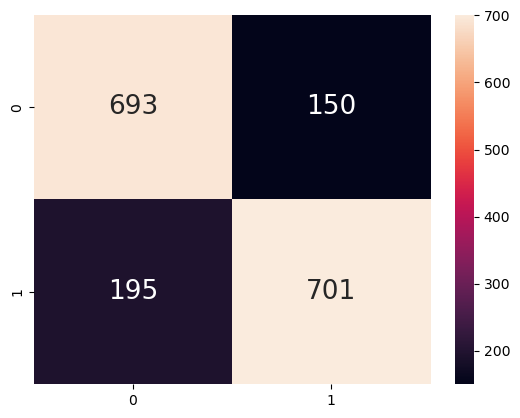

In [ ]:
# prompt: create a solution to improve all the previous model

from sklearn.ensemble import VotingClassifier

# Create a VotingClassifier ensemble model.
voting_classifier_hard = VotingClassifier(estimators=[('dt',dt), ('rf', rf), ('svm', svm1), ('gb', gb1), ('xgb', xgb1), ('mlp1',mlp1)],
                                          n_jobs= -1, voting='hard')

# Fit the VotingClassifier ensemble model to the training data.
voting_classifier_hard.fit(X_train, y_train)

# Evaluate the VotingClassifier ensemble model on the validation data.
print("Classification Accuracy \t:", voting_classifier_hard.score(X_val, y_val))
cv_scores = cross_val_score(voting_classifier_hard, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("%f accuracy with a standard deviation of %f" % (cv_scores.mean(), cv_scores.std()))

y_val_pred = voting_classifier_hard.predict(X_val)
# Precision: TP/(TP+FP)
print("Precision:", precision_score(y_val, y_val_pred, average='weighted'))
# Recall: TP/(TP+FN)
print("Recall:", recall_score(y_val, y_val_pred, average='weighted'))
# F1 Score: 2*recall*precision/(recall+precision) ie. balance between precision and recall
print("F1 Score:", f1_score(y_val, y_val_pred, average='weighted'))

sns.heatmap(confusion_matrix(y_val, y_val_pred),
           annot = True, fmt=".0f", annot_kws={"size": 19})


Classification Accuracy 	: 0.8079355951696378

Cross-Validation Scores: [0.80014378 0.79439252 0.81092739 0.78648454 0.79568345]

0.797526 accuracy with a standard deviation of 0.008020

Precision: 0.8080155561216641
Recall: 0.8079355951696378
F1 Score: 0.8079584743851687

Classification Accuracy 	: 0.8090856814261069
Cross-Validation Scores: [0.80661395 0.80086269 0.80445723 0.79007908 0.80071942]
0.800546 accuracy with a standard deviation of 0.005689
Precision: 0.8100077004933932
Recall: 0.8090856814261069
F1 Score: 0.8091185111289788


<Axes: >

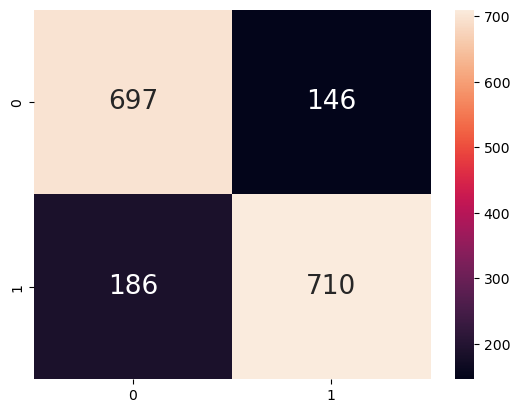

In [ ]:
# prompt: create a solution to improve all the previous model

from sklearn.ensemble import VotingClassifier

# Create a VotingClassifier ensemble model.
voting_classifier_soft = VotingClassifier(estimators=[('dt',dt), ('rf', rf), ('svm', svm1), ('gb', gb1), ('xgb', xgb1), ('mlp1',mlp1)],
                                          n_jobs= -1,voting='soft')

# Fit the VotingClassifier ensemble model to the training data.
voting_classifier_soft.fit(X_train, y_train)

# Evaluate the VotingClassifier ensemble model on the validation data.
print("Classification Accuracy \t:", voting_classifier_soft.score(X_val, y_val))
cv_scores = cross_val_score(voting_classifier_soft, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("%f accuracy with a standard deviation of %f" % (cv_scores.mean(), cv_scores.std()))

y_val_pred = voting_classifier_soft.predict(X_val)
# Precision: TP/(TP+FP)
print("Precision:", precision_score(y_val, y_val_pred, average='weighted'))
# Recall: TP/(TP+FN)
print("Recall:", recall_score(y_val, y_val_pred, average='weighted'))
# F1 Score: 2*recall*precision/(recall+precision) ie. balance between precision and recall
print("F1 Score:", f1_score(y_val, y_val_pred, average='weighted'))

sns.heatmap(confusion_matrix(y_val, y_val_pred),
           annot = True, fmt=".0f", annot_kws={"size": 19})


## tensorflow keras

Epoch 1/500
28/28 [==============================] - 4s 32ms/step - loss: 0.7224 - binary_accuracy: 0.6586 - val_loss: 0.6613 - val_binary_accuracy: 0.5566
Epoch 2/500
28/28 [==============================] - 1s 24ms/step - loss: 0.6152 - binary_accuracy: 0.6891 - val_loss: 0.6437 - val_binary_accuracy: 0.5699
Epoch 3/500
28/28 [==============================] - 1s 23ms/step - loss: 0.6032 - binary_accuracy: 0.6934 - val_loss: 0.6180 - val_binary_accuracy: 0.7194
Epoch 4/500
28/28 [==============================] - 1s 23ms/step - loss: 0.5771 - binary_accuracy: 0.7036 - val_loss: 0.6053 - val_binary_accuracy: 0.7171
Epoch 5/500
28/28 [==============================] - 1s 24ms/step - loss: 0.5643 - binary_accuracy: 0.7045 - val_loss: 0.5945 - val_binary_accuracy: 0.7165
Epoch 6/500
28/28 [==============================] - 1s 24ms/step - loss: 0.5538 - binary_accuracy: 0.7137 - val_loss: 0.5780 - val_binary_accuracy: 0.7228
Epoch 7/500
28/28 [==============================] - 1s 22ms/ste

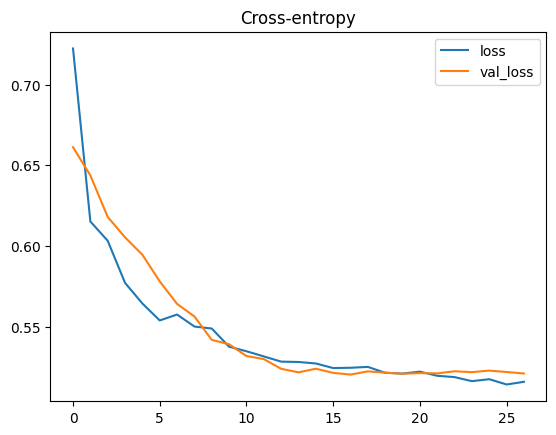

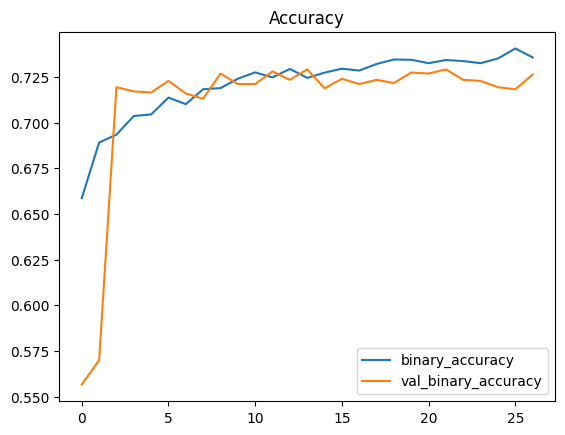

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping
input_shape = [X_train.shape[1]]

X_train = X_train.astype(int)
X_val = X_val.astype(int)

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True,
)

tfl = tf.keras.models.Sequential([
  layers.BatchNormalization(input_shape=input_shape),
  tf.keras.layers.Dense(512, activation='relu'),
  layers.BatchNormalization(),
  layers.Dropout(0.3),
  tf.keras.layers.Dense(512, activation='relu'),
  layers.BatchNormalization(),
  layers.Dropout(0.3),
  tf.keras.layers.Dense(128, activation='relu'),
  layers.BatchNormalization(),
  layers.Dropout(0.3),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

tfl.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['binary_accuracy'],
)

history = tfl.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
    #verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_binary_accuracy'].max()))

55/55 [==============================] - 0s 2ms/step
Precision: 0.7396872339730677
Recall: 0.7211040828062104
F1 Score: 0.7173486279095789


<Axes: >

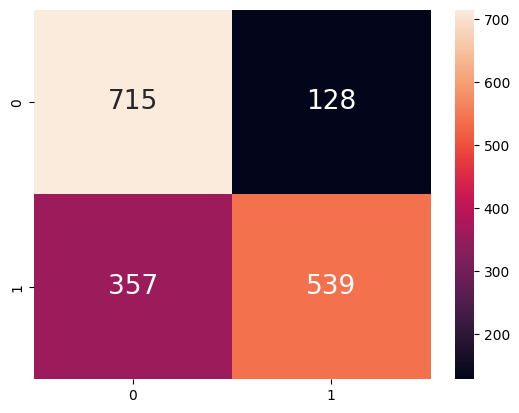

In [ ]:
y_val_pred = tfl.predict(X_val)
y_val_pred = (y_val_pred > 0.5).astype(int)

# Precision: TP/(TP+FP)
print("Precision:", precision_score(y_val, y_val_pred, average='weighted'))
# Recall: TP/(TP+FN)
print("Recall:", recall_score(y_val, y_val_pred, average='weighted'))
# F1 Score: 2*recall*precision/(recall+precision) ie. balance between precision and recall
print("F1 Score:", f1_score(y_val, y_val_pred, average='weighted'))

sns.heatmap(confusion_matrix(y_val, y_val_pred),
           annot = True, fmt=".0f", annot_kws={"size": 19})

In [ ]:
tfl.evaluate(X_val, y_val)

55/55 [==============================] - 0s 3ms/step - loss: 0.3875 - binary_accuracy: 0.8125


[0.3874644637107849, 0.8125359416007996]

In [ ]:
tfl.metrics_names

['loss', 'binary_accuracy']

In [ ]:
!pip install scikeras

In [ ]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from scikeras.wrappers import KerasClassifier

def create_model():
    model = Sequential([
  # layers.BatchNormalization(input_shape=input_shape),
  tf.keras.layers.Dense(512, activation='relu',input_shape=input_shape),
  # layers.BatchNormalization(),
  # layers.Dropout(0.3),
  tf.keras.layers.Dense(512, activation='relu'),
  # layers.BatchNormalization(),
  # layers.Dropout(0.3),
  tf.keras.layers.Dense(128, activation='relu'),
  # layers.BatchNormalization(),
  # layers.Dropout(0.3),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(model=create_model, epochs=40, batch_size=256, verbose=0)

cv_scores = cross_val_score(model, X_train, y_train,cv=StratifiedKFold(n_splits=5), scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("%f accuracy with a standard deviation of %f" % (cv_scores.mean(), cv_scores.std()))

y_val_pred = mlp1.predict(X_val)

Cross-Validation Scores: [0.67577283 0.76563623 0.78432782 0.78720345 0.79208633]
0.761005 accuracy with a standard deviation of 0.043548


# make prediction using test data

In [ ]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
test_data.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [ ]:
test_data[['PassengerGrp', 'PassengerNo']] = test_data['PassengerId'].str.split('_',expand=True)
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,PassengerGrp,PassengerNo
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0013,01
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0018,01
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0019,01
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0021,01
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0023,01


In [ ]:
test_data[['CabDeck', 'CabNum', 'CabSide']] = test_data['Cabin'].str.split('/',expand=True)
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,PassengerGrp,PassengerNo,CabDeck,CabNum,CabSide
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0013,01,G,3,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0018,01,F,4,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0019,01,C,0,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0021,01,C,1,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0023,01,F,5,S


In [ ]:
test_data = test_data[['PassengerGrp', 'PassengerNo','HomePlanet', 'CryoSleep','CabDeck', 'CabNum', 'CabSide','Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name']]
test_data.head()

,PassengerGrp,PassengerNo,HomePlanet,CryoSleep,CabDeck,CabNum,CabSide,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013,01,Earth,True,G,3,S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018,01,Earth,False,F,4,S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019,01,Europa,True,C,0,S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021,01,Europa,False,C,1,S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023,01,Earth,False,F,5,S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
test_data.dtypes

PassengerGrp     object
PassengerNo      object
HomePlanet       object
CryoSleep        object
CabDeck          object
CabNum           object
CabSide          object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object

In [ ]:
test_data['IsNotAlone'] = test_data['PassengerGrp'].eq(test_data['PassengerGrp'].shift(1)) | test_data['PassengerGrp'].eq(test_data['PassengerGrp'].shift(-1))
test_data.tail()

<ipython-input-78-47730737297b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['IsNotAlone'] = test_data['PassengerGrp'].eq(test_data['PassengerGrp'].shift(1)) | test_data['PassengerGrp'].eq(test_data['PassengerGrp'].shift(-1))


,PassengerGrp,PassengerNo,HomePlanet,CryoSleep,CabDeck,CabNum,CabSide,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,IsNotAlone
4272,9266,02,Earth,True,G,1496,S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,True
4273,9269,01,Earth,False,NaN,NaN,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,False
4274,9271,01,Mars,True,D,296,P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,False
4275,9273,01,Europa,False,D,297,P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,False
4276,9277,01,Earth,True,G,1498,S,PSO J318.5-22,43.0,False,0.0,0.0,0.0,0.0,0.0,Lilace Leonzaley,False


In [ ]:
test_data['group_size'] = test_data.groupby('PassengerGrp')['PassengerNo'].transform('size')

In [ ]:
test_data['HomePlanet'] = test_data.groupby('PassengerGrp')['HomePlanet'].fillna(method = 'ffill')
test_data['HomePlanet'] = test_data.groupby('PassengerGrp')['HomePlanet'].fillna(method = 'bfill')

test_data['Destination'] = test_data.groupby('PassengerGrp')['Destination'].fillna(method = 'ffill')
test_data['Destination'] = test_data.groupby('PassengerGrp')['Destination'].fillna(method = 'bfill')

cabin_list = ['CabDeck', 'CabNum', 'CabSide']
for i in cabin_list:
    test_data[i] = test_data.groupby('PassengerGrp')[i].fillna(method = 'ffill')
    test_data[i] = test_data.groupby('PassengerGrp')[i].fillna(method = 'bfill')

In [ ]:
test_data[(test_data['CabDeck'].isna()) & (test_data['HomePlanet'].isna())]

,PassengerGrp,PassengerNo,HomePlanet,CryoSleep,CabDeck,CabNum,CabSide,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,IsNotAlone,group_size
3421,7469,01,NaN,False,NaN,NaN,NaN,TRAPPIST-1e,24.0,False,433.0,110.0,209.0,23.0,0.0,Cliney Baxterson,False,1


In [ ]:
test_data['HomePlanet'] = test_data.apply(fill_home_planet, axis = 1)
test_data['CabDeck'] = test_data.apply(fill_deck, axis = 1)

In [ ]:
test_data.isna().sum()

PassengerGrp      0
PassengerNo       0
HomePlanet        1
CryoSleep        93
CabDeck           1
CabNum           63
CabSide          63
Destination      51
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
IsNotAlone        0
group_size        0
dtype: int64

In [ ]:
test_data[['HomePlanet','CabDeck','CabNum','CabSide','Destination']] = \
    test_data[['HomePlanet','CabDeck','CabNum','CabSide','Destination']].fillna(method='ffill')
test_data['CryoSleep'] = test_data['CryoSleep'].fillna(np.random.choice([True, False]))
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())

In [ ]:
test_data['VIP'] = test_data['VIP'].fillna(np.random.choice([True,False]))

In [ ]:
test_data[['RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = \
    test_data[['RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(0)

In [ ]:
test_data['Spending'] = test_data['RoomService'] + test_data['FoodCourt'] + test_data['ShoppingMall'] +test_data['Spa'] + test_data['VRDeck']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

columns_to_rescale = ['Age', 'RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Spending']
scaler = MinMaxScaler()
test_data[columns_to_rescale] = scaler.fit_transform(test_data[columns_to_rescale])

In [ ]:
test_data.head()

,PassengerGrp,PassengerNo,HomePlanet,CryoSleep,CabDeck,CabNum,CabSide,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,IsNotAlone,group_size,Spending
0,0013,01,Earth,True,G,3,S,TRAPPIST-1e,0.341772,False,0.000000,0.000000,0.00000,0.000000,0.000000,Nelly Carsoning,False,1,0.000000
1,0018,01,Earth,False,F,4,S,TRAPPIST-1e,0.240506,False,0.000000,0.000356,0.00000,0.142260,0.000000,Lerome Peckers,False,1,0.084120
2,0019,01,Europa,True,C,0,S,55 Cancri e,0.392405,False,0.000000,0.000000,0.00000,0.000000,0.000000,Sabih Unhearfus,False,1,0.000000
3,0021,01,Europa,False,C,1,S,TRAPPIST-1e,0.481013,False,0.000000,0.263206,0.00000,0.009121,0.026266,Meratz Caltilter,False,1,0.220341
4,0023,01,Earth,False,F,5,S,TRAPPIST-1e,0.253165,False,0.000865,0.000000,0.07658,0.000000,0.000000,Brence Harperez,False,1,0.019159


In [ ]:
test_data = test_data.drop(['Name', 'PassengerGrp','PassengerNo'], axis = 1) #'RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Spending'

In [ ]:
test_data.isna().sum()

HomePlanet      0
CryoSleep       0
CabDeck         0
CabNum          0
CabSide         0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
IsNotAlone      0
group_size      0
Spending        0
dtype: int64

In [ ]:
test_data[['CabNum','CryoSleep','VIP','IsNotAlone']] = test_data[['CabNum','CryoSleep','VIP','IsNotAlone']].astype(int)

In [ ]:
test_data.dtypes

HomePlanet       object
CryoSleep         int64
CabDeck          object
CabNum            int64
CabSide          object
Destination      object
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
IsNotAlone        int64
group_size        int64
Spending        float64
dtype: object

In [ ]:
test_data.columns

Index(['HomePlanet', 'CryoSleep', 'CabDeck', 'CabNum', 'CabSide',
       'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'IsNotAlone', 'group_size', 'Spending'],
      dtype='object')

In [ ]:
test_data = pd.get_dummies(test_data, columns= ['HomePlanet', 'CabDeck', 'CabSide','Destination'])
test_data.head()

,CryoSleep,CabNum,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,IsNotAlone,...,CabDeck_D,CabDeck_E,CabDeck_F,CabDeck_G,CabDeck_T,CabSide_P,CabSide_S,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,1,3,0.341772,0,0.000000,0.000000,0.00000,0.000000,0.000000,0,...,0,0,0,1,0,0,1,0,0,1
1,0,4,0.240506,0,0.000000,0.000356,0.00000,0.142260,0.000000,0,...,0,0,1,0,0,0,1,0,0,1
2,1,0,0.392405,0,0.000000,0.000000,0.00000,0.000000,0.000000,0,...,0,0,0,0,0,0,1,1,0,0
3,0,1,0.481013,0,0.000000,0.263206,0.00000,0.009121,0.026266,0,...,0,0,0,0,0,0,1,0,0,1
4,0,5,0.253165,0,0.000865,0.000000,0.07658,0.000000,0.000000,0,...,0,0,1,0,0,0,1,0,0,1


In [ ]:
test_data.columns

Index(['CryoSleep', 'CabNum', 'Age', 'VIP', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'IsNotAlone', 'group_size', 'Spending',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'CabDeck_A',
       'CabDeck_B', 'CabDeck_C', 'CabDeck_D', 'CabDeck_E', 'CabDeck_F',
       'CabDeck_G', 'CabDeck_T', 'CabSide_P', 'CabSide_S',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e'],
      dtype='object')

In [ ]:
list_model = [dt, rf, svm1, gb1, xgb1, mlp1, voting_classifier_hard, voting_classifier_soft]
list_str = ['dt', 'rf', 'svm1', 'gb1', 'xgb1', 'mlp1', 'vote_hard', 'vote_soft']
for i in range(len(list_model)):
    file_name = 'submission_' + str(list_str[i]) + '.csv'
    predictions = list_model[i].predict(test_data)
    if list_str[i] == 'xgb1':
        predictions = predictions.astype(bool)
    output = pd.DataFrame({'PassengerId': test_data2.PassengerId, 'Transported': predictions})
    output.to_csv(file_name, index=False)
    print(file_name)

submission_dt.csv
submission_rf.csv


submission_svm1.csv
submission_gb1.csv
submission_xgb1.csv
submission_mlp1.csv
submission_vote_hard.csv
submission_vote_soft.csv


In [ ]:
predictions = tfl.predict(test_data)
predictions = (predictions > 0.5).astype(int)
predictions = predictions.astype(bool)
predictions = np.squeeze(predictions)
output = pd.DataFrame({'PassengerId': test_data2.PassengerId, 'Transported': predictions})

134/134 [==============================] - 0s 2ms/step


In [ ]:
predictions

array([False, False,  True, ...,  True, False,  True])

In [ ]:
file_name = 'submission_tfl.csv'
predictions = tfl.predict(test_data)
predictions = (predictions > 0.5).astype(int)
predictions = predictions.astype(bool)
predictions = np.squeeze(predictions)

output = pd.DataFrame({'PassengerId': test_data2.PassengerId, 'Transported': predictions})
output.to_csv(file_name, index=False)
print(file_name)

134/134 [==============================] - 0s 3ms/step
submission_tfl.csv
